# Lab03: Logistic Regression.

- Student ID: 21127191
- Student name: Nguyễn Nhật Truyền

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Load data

In [86]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [87]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [88]:
labels=np.unique(y)
print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label

#TODO compute average intensity for each label

# Compute average intensity for each label
for label in labels:
    label_indices = (y == label)
    mean_intensity = np.mean(X[label_indices], axis=0)
    l_means[int(label)] = mean_intensity.mean()

# Print the computed average intensities
print(l_means)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[44.17740512 19.40680177 38.03420776 36.15420938 30.99599983 32.95015873
 35.23486491 29.21798737 38.39790125 31.35940809]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

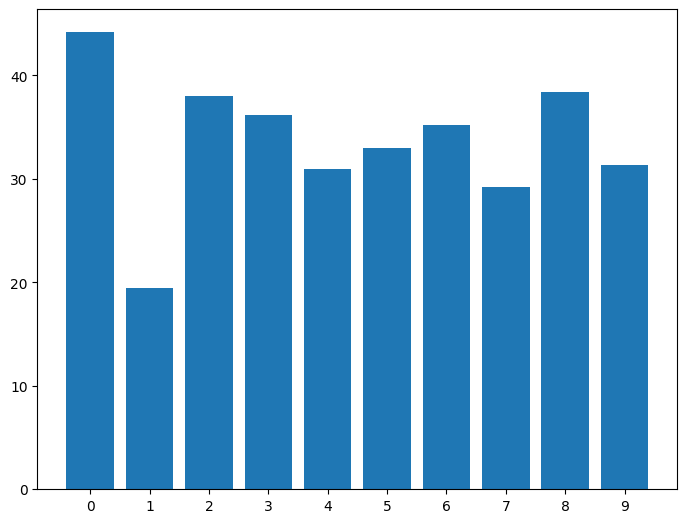

In [89]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [90]:
#TODO compute average intensity for each data sample
# intensity=?
intensity = np.mean(X, axis=1)
print(intensity.shape)

(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [91]:
X_flip = np.flipud(np.fliplr(X))
symmetry = np.mean((X-X_flip),axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this feature work.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [92]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.column_stack((symmetry,intensity))
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**
- **TODO: Why should we normalize data?**

In [93]:
#TODO: normalize X_new
mean_values = np.mean(X_new, axis=0)
std_dev_values = np.std(X_new, axis=0)
X_new_normalized = (X_new - mean_values) / std_dev_values
print(X_new)

[[-18.25        35.10841837]
 [  5.78571429  39.6619898 ]
 [-12.48469388  24.7997449 ]
 ...
 [ 12.48469388  37.28443878]
 [ -5.78571429  33.87627551]
 [ 18.25        53.35841837]]


### Construct  data

In [94]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.to_numpy().astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=y_new.reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 3)
(70000, 1)


### Split data

In [95]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [96]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [97]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):

    '''Take the dot product between our features and weight matrix,
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [110]:
def compute_gradient(train_X, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function.
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = np.dot(train_X.T, error) / train_X.shape[0]
    return gradient

In [111]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(train_X, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))

    return W

### Train our model

In [112]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

<ipython-input-111-9a0285e5c1ad>:5: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
<ipython-input-111-9a0285e5c1ad>:5: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))


Epoch 1000, loss 0.266
Epoch 2000, loss 0.261
Epoch 3000, loss 0.257
Epoch 4000, loss 0.254
Epoch 5000, loss 0.250
Epoch 6000, loss 0.247
Epoch 7000, loss 0.244
Epoch 8000, loss 0.241
Epoch 9000, loss 0.238
Epoch 10000, loss 0.236
Epoch 11000, loss 0.234
Epoch 12000, loss 0.231
Epoch 13000, loss 0.229
Epoch 14000, loss 0.228
Epoch 15000, loss 0.226
Epoch 16000, loss 0.224
Epoch 17000, loss 0.223
Epoch 18000, loss 0.222
Epoch 19000, loss 0.220
Epoch 20000, loss 0.219
Epoch 21000, loss 0.218
Epoch 22000, loss 0.217
Epoch 23000, loss 0.216
Epoch 24000, loss 0.215
Epoch 25000, loss 0.214
Epoch 26000, loss 0.213
Epoch 27000, loss 0.213
Epoch 28000, loss 0.212
Epoch 29000, loss 0.211
Epoch 30000, loss 0.211
Epoch 31000, loss 0.210
Epoch 32000, loss 0.209
Epoch 33000, loss 0.209
Epoch 34000, loss 0.208
Epoch 35000, loss 0.208
Epoch 36000, loss 0.208
Epoch 37000, loss 0.207
Epoch 38000, loss 0.207
Epoch 39000, loss 0.206
Epoch 40000, loss 0.206
Train err of final w:  8.462082413697045


## 3. Evaluate our model

In [113]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     41403
           1       0.77      0.36      0.49      5264

    accuracy                           0.92     46667
   macro avg       0.85      0.67      0.72     46667
weighted avg       0.91      0.92      0.90     46667



In [115]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     20720
           1       0.76      0.34      0.47      2613

    accuracy                           0.91     23333
   macro avg       0.84      0.66      0.71     23333
weighted avg       0.90      0.91      0.90     23333



**TODO: Comment on the result**
*   Class Imbalance: The model excels in classifying the majority class (Class 0), showing high precision, recall, and F1-score. However, the performance on the minority class (Class 1) is notably lower, with a particularly low recall, indicating difficulty in identifying positive instances.
*   Overall Accuracy: The overall accuracy is relatively high, but given the class imbalance, it might not be the most reliable metric. It's crucial to consider precision, recall, and F1-score, especially for the minority class, to assess the model's true effectiveness.
*   Recommendations: addressing class imbalance through techniques like oversampling or adjusting class weights could improve the model's performance on the minority class. Additionally, fine-tuning the model or exploring different algorithms may be beneficial.
*   Balancing Metrics: It's important to strike a balance between precision and recall, especially when dealing with imbalanced datasets. Depending on the specific goals and costs associated with false positives and false negatives, you might need to adjust the model accordingly.

